<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/Coding_Algorithm/Coding_240329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1일 1코딩 알고리즘 연습

## 24년 3월 29일 금요일

https://www.acmicpc.net/problem/1260

문제

그래프를 DFS로 탐색한 결과와 BFS로 탐색한 결과를 출력하는 프로그램을 작성하시오. 단, 방문할 수 있는 정점이 여러 개인 경우에는 정점 번호가 작은 것을 먼저 방문하고, 더 이상 방문할 수 있는 점이 없는 경우 종료한다. 정점 번호는 1번부터 N번까지이다.

입력

첫째 줄에 정점의 개수 N(1 ≤ N ≤ 1,000), 간선의 개수 M(1 ≤ M ≤ 10,000), 탐색을 시작할 정점의 번호 V가 주어진다. 다음 M개의 줄에는 간선이 연결하는 두 정점의 번호가 주어진다. 어떤 두 정점 사이에 여러 개의 간선이 있을 수 있다. 입력으로 주어지는 간선은 양방향이다.

출력

첫째 줄에 DFS를 수행한 결과를, 그 다음 줄에는 BFS를 수행한 결과를 출력한다. V부터 방문된 점을 순서대로 출력하면 된다.

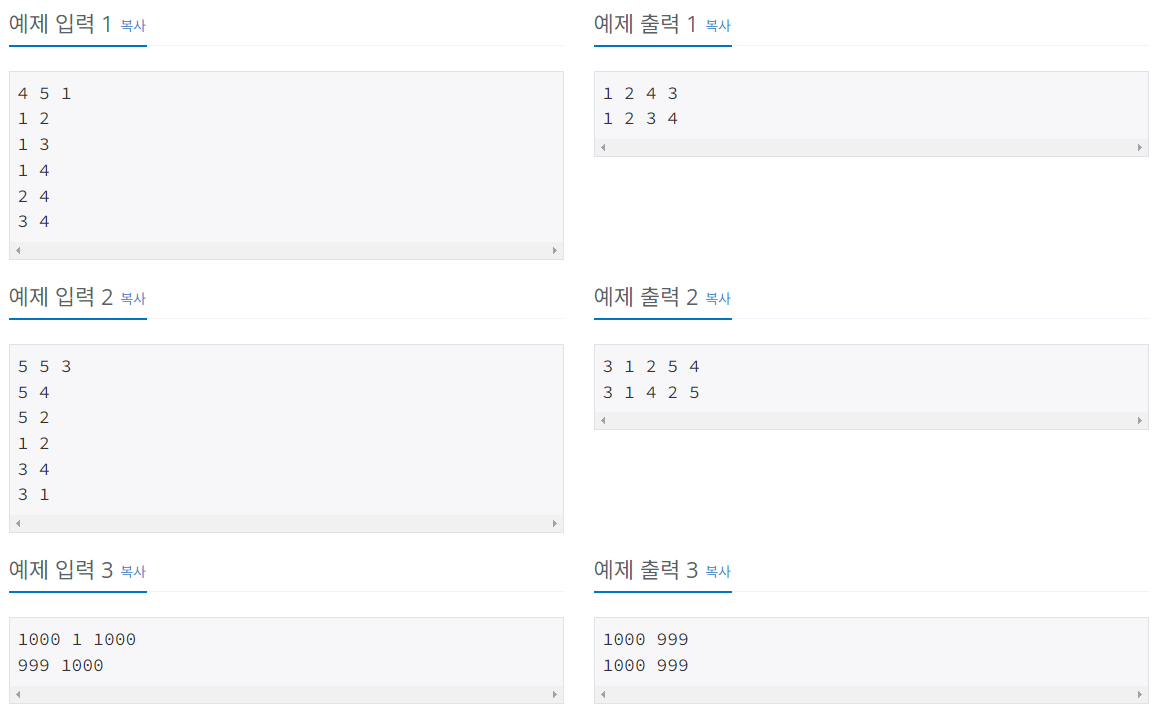

#문제 풀이

DFS / BFS 기본 문제

## DFS

In [ ]:
N = 4
M = 5
V = 1
net = [[1, 2], [1, 3], [1, 4], [2, 4], [3, 4]]

In [ ]:
graph = [[False] * (N+1) for _ in range(N+1)]
visited = [False] * (N+1)

In [ ]:
graph

[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]]

In [ ]:
visited

[False, False, False, False, False]

In [ ]:
for i in net:
    a, b = i
    graph[a][b] = True
    graph[b][a] = True
graph

[[False, False, False, False, False],
 [False, False, True, True, True],
 [False, True, False, False, True],
 [False, True, False, False, True],
 [False, True, True, True, False]]

In [ ]:
# dfs
visited = [False] * (N+1)
visited

[False, False, False, False, False]

In [ ]:
def dfs(idx):
    visited[idx] = True
    print(idx, end = ' ')
    for next in range(1, N+1):
        if not visited[next] and graph[idx][next]:
            dfs(next)

In [ ]:
dfs(V)

1 2 4 3 

In [ ]:
# 입력값 정의
N, M, V = map(int, input("총 노드의 개수, 간선의 개수, 시작점 : ").split())

# 그래프와 방문 리스트 정의
graph = [[False] * (N+1) for _ in range(N+1)]
visited = [False] * (N+1)

for _ in range(M):
    a, b = map(int, input("시작점, 끝점 : ").split())
    graph[a][b] = True
    graph[b][a] = True

# dfs 함수
def dfs(idx):
    visited[idx] = True
    print(idx, end = ' ')
    for next in range(1, N+1):
        if not visited[next] and graph[idx][next]:
            dfs(next)

dfs(V)

총 노드의 개수, 간선의 개수, 시작점 : 4 5 1
시작점, 끝점 : 1 2
시작점, 끝점 : 1 3
시작점, 끝점 : 1 4
시작점, 끝점 : 2 4
시작점, 끝점 : 3 4
1 2 4 3 

## BFS

In [ ]:
# bfs
visited = [False] * (N+1)
visited

[False, False, False, False, False]

In [ ]:
q = [V]
q

[1]

In [ ]:
def bfs():
    while q:
        cur = q.pop(0)
        print(cur, end = ' ')
        for next in range(1, N+1):
            if not visited[next] and graph[cur][next]:
                visited[next] = True
                q.append(next)

In [ ]:
visited = [False] * (N+1)
visited[V] = True
q = [V]
bfs()

1 2 3 4 

In [ ]:
# 입력값 정의
N, M, V = map(int, input("총 노드의 개수, 간선의 개수, 시작점 : ").split())

# 그래프와 방문 리스트 정의
graph = [[False] * (N+1) for _ in range(N+1)]
visited = [False] * (N+1)

for _ in range(M):
    a, b = map(int, input("시작점, 끝점 : ").split())
    graph[a][b] = True
    graph[b][a] = True

# bfs 함수
def bfs():
    while q:
        cur = q.pop(0)
        print(cur, end = ' ')
        for next in range(1, N+1):
            if not visited[next] and graph[cur][next]:
                visited[next] = True
                q.append(next)

# bfs
q = [V]
visited[V] = True
bfs()

총 노드의 개수, 간선의 개수, 시작점 : 4 5 1
시작점, 끝점 : 1 2
시작점, 끝점 : 1 3
시작점, 끝점 : 1 4
시작점, 끝점 : 2 4
시작점, 끝점 : 3 4
1 2 3 4 

# 최종답

In [ ]:
# 최종답

# dfs 함수
def dfs(idx):
    visited[idx] = True
    print(idx, end = ' ')
    for next in range(1, N+1):
        if not visited[next] and graph[idx][next]:
            dfs(next)

# bfs 함수
def bfs():
    while q:
        cur = q.pop(0)
        print(cur, end = ' ')
        for next in range(1, N+1):
            if not visited[next] and graph[cur][next]:
                visited[next] = True
                q.append(next)

# 입력값 정의
N, M, V = map(int, input().split())

# 그래프와 방문 리스트 정의
graph = [[False] * (N+1) for _ in range(N+1)]
visited = [False] * (N+1)

for _ in range(M):
    a, b = map(int, input().split())
    graph[a][b] = True
    graph[b][a] = True

# dfs
dfs(V)
print()

# bfs
visited = [False] * (N+1)
q = [V]
visited[V] = True
bfs()

4 5 1
1 2
1 3
1 4
2 4
3 4
1 2 4 3 
1 2 3 4 